<a href="https://colab.research.google.com/github/wahyudi0018/ML_Ganjil_2024/blob/main/Jobsheet9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Wahyudi**

**Kelas : TI-3C**

**No. Absen : 26**

Untuk detail kode dan dokumentasi lebih lanjut, kunjungi [repository GitHub](https://github.com/wahyudi0018/ML_Ganjil_2024/blob/main/Jobsheet9_ML.ipynb).

**Praktikum 1**

Klasifikasi Iris dengan Perceptron

Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.
Untuk menambah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

*Langkah 1 - Import Library*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

*Langkah 2 - Load Data dan Visualisasi*

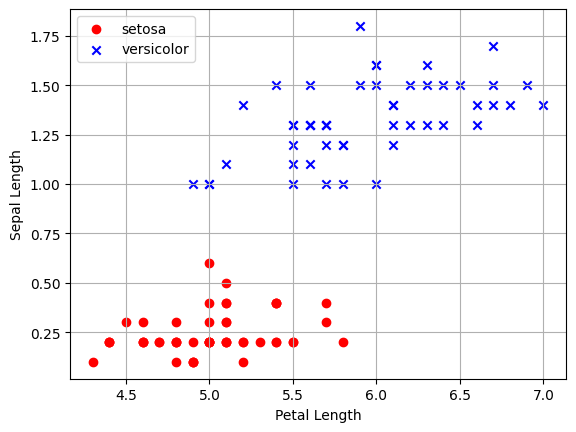

In [ ]:
df = pd.read_csv('Iris.csv', header=None)
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

*Langkah 3 - Membuat Kelas Perceptron*

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

*Langkah 4 - Pilih Data dan Encoding Label*

In [ ]:
y = df.iloc[0:100, 4].values  # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1)  # ganti coding label
X = df.iloc[0:100, [0, 3]].values  # slice data latih

*Langkah 5 - Fitting Model*

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

*Langkah 6 - Visualisasi Nilai Erro Per Epoch*

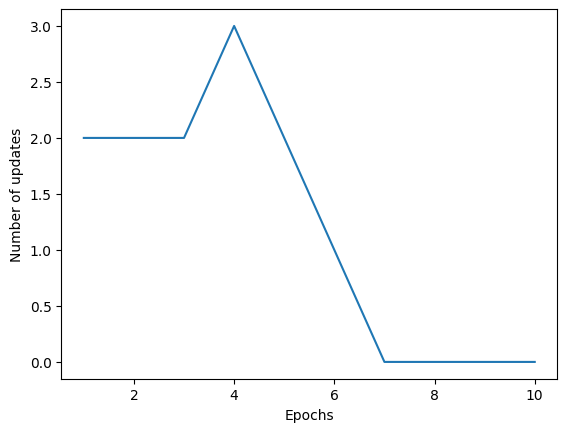

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

*Langkah 7 - Visualisasi Decision Boundary*

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

**Praktikum 2**

Klasifikasi Berita dengan Perceptron

Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu **Sport Hockey**, **Sport Baseball**, dan **Otomotif**. Proses klasifikasi akan menggunakan model Perceptron.

*Langkah 1 - Import Library*

In [ ]:
from sklearn.datasets import fetch_20newsgroups  # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

*Langkah 2 - Pilih Label dan Split Data*

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

*Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron*

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen.

Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets.

Pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

**Praktikum 3**

Nilai Logika XOR dengan MLP

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

*Langkah 1 - Import Library*

In [ ]:
from sklearn.neural_network import MLPClassifier

*LangKah 2 - Buat Data*

In [ ]:
y = [0, 1, 1, 0]  # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # data

*Langkah 3 - Fit Model*

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

*Langkah 4 - Prediksi*

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i, p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


**Praktikum 4**

Klasifikasi dengan ANN

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai *'churn'*. Tingkat churn yang tinggi *(chrun rate)* akan berdampak tidak baik bagi perusahaan.

Pra Pengolahan Data

*Langkah 1 - Import Library*

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

*Langkah 2 - Load Data*

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data(X)

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


*Langkah 3 - Encoding Data Kategorikal*

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


*Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder*

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]]


*Langkah 5 - Split Data*

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

*Langkah 6 - Scaling Fitur*

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Membuat Model ANN

*Langkah 1 - Inisiasi Model ANN*

In [ ]:
ann = tf.keras.models.Sequential()

*Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama*

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

*Langkah 3 - Membuat Hidden Layer Kedua*

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

*Langkah 4 - Membuat Output Layer*

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Training Model

*Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN*

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

*Langkah 2 - Fitting Model*

In [ ]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4443 - loss: 0.7943
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 0.4918
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7983 - loss: 0.4600
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.4288
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 0.4273
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8132 - loss: 0.4145
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.4015
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8272 - loss: 0.3841
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8221 - loss: 0.3795
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8279 - loss: 0.3714
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.3797
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Membuat Prediksi

Diberikan informasi sebagai berikut,

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

Modelkan Data Baru dan Buat Prediksi

In [ ]:
# Tambahkan fitur yang hilang (contoh menggunakan 0)
data_input = [[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000, 0]]  # Misalkan fitur ke-13 adalah 0
prediksi = ann.predict(sc.transform(data_input)) > 0.5
print(prediksi)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
[[False]]


Apakah hasilnya False?

Prediksi Dengan Data Testing

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Cek Akurasi dan Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1517   78]
 [ 201  204]]


0.8605

### **Kelompok 6**

Eddo Dava Alfarisi 		(2241720232)

Fanesabirawaning Sulistyo 	(2241720027)

Lintang Aprill Sari (2241720231)

Wahyudi 			(2241720018)


### **Tugas Neural Network dan Deep Learning**



* Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
* Anda diperbolehkan melakukan eksplorasi terhadap,
  * Metode pra pengolahan
  * Pemilihan fitur
  * Arsitektur ANN
  * Fungsi Aktiviasi
* ANN diimplementasikan dengan menggunakan tensorflow.
* DIKERJAKAN SECARA BERKELOMPOK
* JELASKAN HASIL YANG ANDA DAPATKAN,
  * AKURASI
  * CONFUSION MATRIX
  * KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
Anda diperbolehkan melakukan eksplorasi terhadap,
Metode pra pengolahan
Pemilihan fitur
Arsitektur ANN
Fungsi Aktiviasi
ANN diimplementasikan dengan menggunakan tensorflow.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


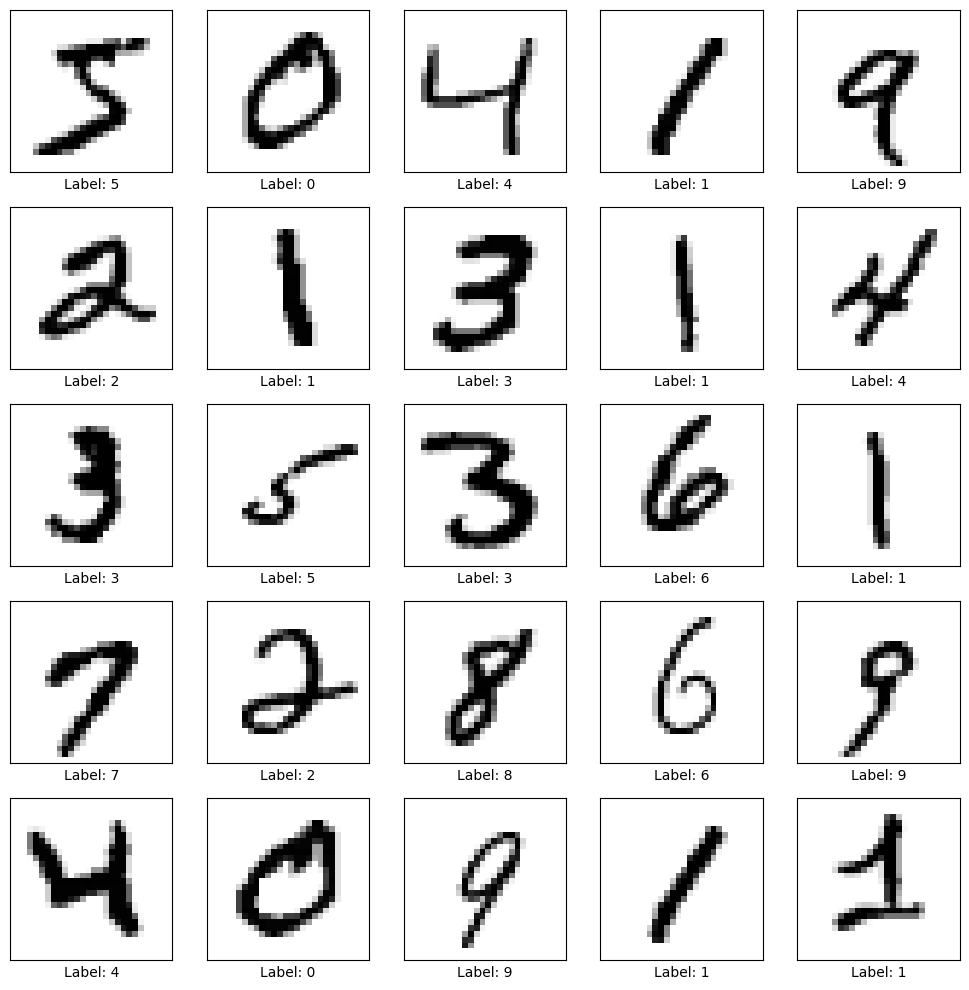

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test data: (10000, 28, 28)
Shape of test labels: (10000,)


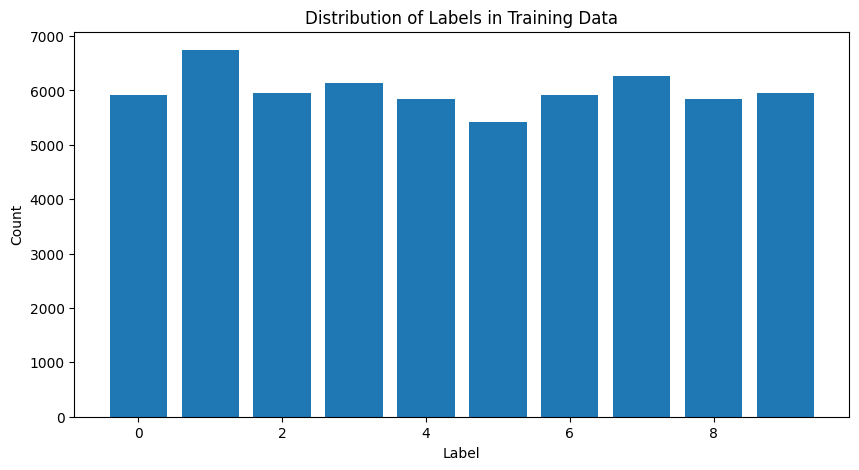

Min pixel value: 0
Max pixel value: 255
Mean pixel value: 33.32
Standard deviation of pixel values: 78.57


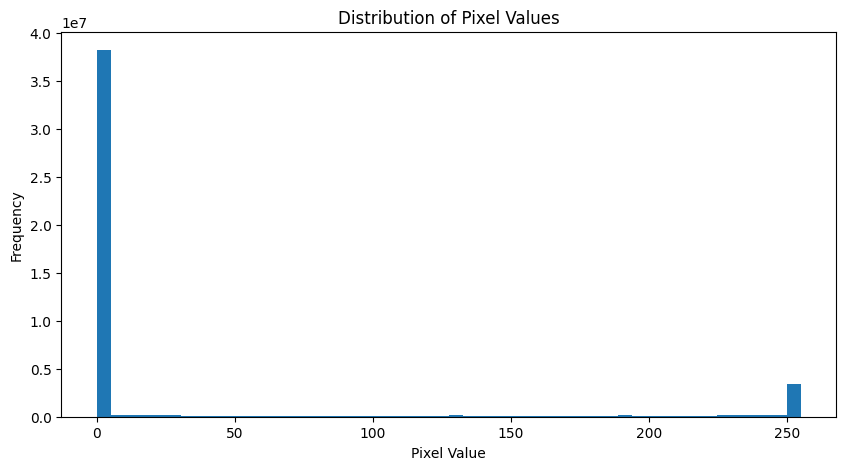

In [ ]:
#@title Import library yang diperlukan dan load data MNIST:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load data MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#@title Pra-pengolahan data:

# Visualisasi beberapa sampel gambar
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(f'Label: {y_train[i]}')
plt.tight_layout()
plt.show()

# Melihat bentuk data
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of test data: {X_test.shape}")
print(f"Shape of test labels: {y_test.shape}")

# Melihat distribusi label
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique, counts)
plt.title('Distribution of Labels in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Melihat statistik pixel
print(f"Min pixel value: {X_train.min()}")
print(f"Max pixel value: {X_train.max()}")
print(f"Mean pixel value: {X_train.mean():.2f}")
print(f"Standard deviation of pixel values: {X_train.std():.2f}")

# Visualisasi distribusi pixel
plt.figure(figsize=(10, 5))
plt.hist(X_train.ravel(), bins=50)
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

TensorFlow dan Keras: Digunakan untuk membangun dan melatih model jaringan saraf (neural networks).
MNIST Dataset: Dataset ini berisi gambar hitam-putih digit angka (0-9) yang berukuran 28x28 piksel. Dataset ini sering digunakan untuk eksperimen dalam bidang machine learning.
X_train, y_train: Data gambar dan label untuk pelatihan.
X_test, y_test: Data gambar dan label untuk pengujian.




kemudian saat visualisasi

Sampel Gambar:

Menampilkan 25 sampel gambar dari dataset training beserta labelnya.
Ini membantu kita memahami secara visual bagaimana gambar-gambar angka tulisan tangan terlihat.


Bentuk Data:

Mencetak bentuk (shape) dari data training dan testing.
Ini membantu kita memahami dimensi data dan jumlah sampel yang tersedia.


Distribusi Label:

Menampilkan histogram distribusi label dalam data training.
Ini membantu kita melihat apakah dataset seimbang atau ada kelas yang overrepresented/underrepresented.


Statistik Pixel:

Mencetak nilai minimum, maksimum, rata-rata, dan standar deviasi dari nilai pixel.
Ini membantu kita memahami rentang dan distribusi nilai pixel dalam dataset.


Distribusi Nilai Pixel:

Menampilkan histogram distribusi nilai pixel dari seluruh dataset training.
Ini membantu kita memahami bagaimana nilai pixel terdistribusi dan apakah ada pola tertentu.

In [ ]:
#@title Pra pengolahan data
# Pra-pengolahan data

# 1. Normalisasi data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 2. Reshape data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# 3. One-hot encoding untuk label
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 4. Membagi data training menjadi training dan validasi
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Memeriksa bentuk data setelah pra-pengolahan
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of validation data: {X_val.shape}")
print(f"Shape of test data: {X_test.shape}")

# Memeriksa nilai pixel setelah normalisasi
print(f"Min pixel value in training data: {X_train.min()}")
print(f"Max pixel value in training data: {X_train.max()}")
print(f"Mean pixel value in training data: {X_train.mean():.4f}")

Shape of training data: (54000, 784)
Shape of validation data: (6000, 784)
Shape of test data: (10000, 784)
Min pixel value in training data: 0.0
Max pixel value in training data: 1.0
Mean pixel value in training data: 0.1307


Normalisasi Data:

Mengubah tipe data ke float32 untuk presisi yang lebih baik.
Membagi nilai pixel dengan 255 untuk mendapatkan nilai antara 0 dan 1.
Ini membantu model konvergen lebih cepat dan menghindari masalah dengan gradien yang terlalu besar.


Reshape Data:

Mengubah bentuk data dari (jumlah_sampel, 28, 28) menjadi (jumlah_sampel, 784).
Ini diperlukan karena kita akan menggunakan fully connected layers yang membutuhkan input 1D.


One-hot Encoding untuk Label:

Mengubah label dari bentuk integer (0-9) menjadi vektor one-hot.
Ini diperlukan untuk klasifikasi multi-kelas dengan menggunakan categorical crossentropy loss.


Membagi Data Training:

Memisahkan 10% data training untuk validasi.
Ini memungkinkan kita untuk memantau performa model pada data yang tidak digunakan dalam pelatihan, membantu mendeteksi overfitting.

In [ ]:
def create_ann_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
input_shape = X_train.shape[1]
num_classes = 10
model = create_ann_model(input_shape, num_classes)

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Fungsi create_ann_model:

Fungsi ini menerima dua parameter: input_shape dan num_classes.
Ini membuat model Sequential dengan beberapa layer:

Dense layer pertama dengan 128 neuron dan aktivasi ReLU
Dropout layer dengan rate 0.2
Dense layer kedua dengan 64 neuron dan aktivasi ReLU
Dropout layer lain dengan rate 0.2
Dense layer output dengan jumlah neuron sesuai num_classes dan aktivasi softmax

Kompilasi model:

Optimizer: Adam
Loss function: categorical crossentropy
Metric: accuracy

Pembuatan model:

input_shape diambil dari dimensi data training (X_train.shape[1])
num_classes diset ke 10 (untuk digit 0-9)
Model dibuat dengan memanggil create_ann_model

Ringkasan model:

model.summary() dipanggil untuk menampilkan struktur model

**Kemudian hasil**
Ini menampilkan ringkasan model yang dibuat:

Layer 1 (dense):

Output shape: (None, 128)
Parameter: 100,480 (784 * 128 + 128 bias)


Layer 2 (dropout):

Output shape: (None, 128)
Parameter: 0 (dropout tidak memiliki parameter yang dapat dilatih)


Layer 3 (dense_1):

Output shape: (None, 64)
Parameter: 8,256 (128 * 64 + 64 bias)


Layer 4 (dropout_1):

Output shape: (None, 64)
Parameter: 0


Layer 5 (dense_2, output layer):

Output shape: (None, 10)
Parameter: 650 (64 * 10 + 10 bias)



Total parameter: 109,386

Trainable params: 109,386
Non-trainable params: 0

# Disingkat


Model ini adalah sebuah Artificial Neural Network (ANN) dengan 3 dense layer dan 2 dropout layer.
Input shape-nya adalah 784 (28x28 piksel dari gambar MNIST yang di-flatten).
Output layer memiliki 10 neuron, sesuai dengan 10 kelas digit (0-9).
Dropout digunakan untuk mencegah overfitting.
Total parameter yang dapat dilatih adalah 109,386, yang cukup besar untuk problem klasifikasi MNIST namun masih dalam batas wajar.



In [ ]:
#@title Training Model
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7503 - loss: 0.8005 - val_accuracy: 0.9498 - val_loss: 0.1722
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9356 - loss: 0.2239 - val_accuracy: 0.9625 - val_loss: 0.1227
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9515 - loss: 0.1635 - val_accuracy: 0.9693 - val_loss: 0.0964
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9618 - loss: 0.1302 - val_accuracy: 0.9738 - val_loss: 0.0888
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9655 - loss: 0.1138 - val_accuracy: 0.9740 - val_loss: 0.0817
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9717 - loss: 0.0951 - val_accuracy: 0.9760 - val_loss: 0.0784
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9720 - loss: 0.0929 - val_accuracy: 0.9785 - val_loss: 0.0754
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9768 - loss: 0.0755 - val_accuracy: 0.

model.fit() digunakan untuk melatih model.
X_train dan y_train: Data training dan labelnya.
epochs=20: Model akan dilatih selama 20 iterasi penuh melalui seluruh dataset.
batch_size=128: Setiap iterasi akan memproses 128 sampel sebelum memperbarui bobot model.
validation_data=(X_val, y_val): Data validasi digunakan untuk memonitor performa model selama training.
verbose=1: Menampilkan progress bar selama training.
history: Objek yang menyimpan metrik training dan validasi untuk setiap epoch.

In [ ]:
#@title Evaluasi Model
# Evaluate the model on training and test data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history

Training accuracy: 0.9975
Test accuracy: 0.9809


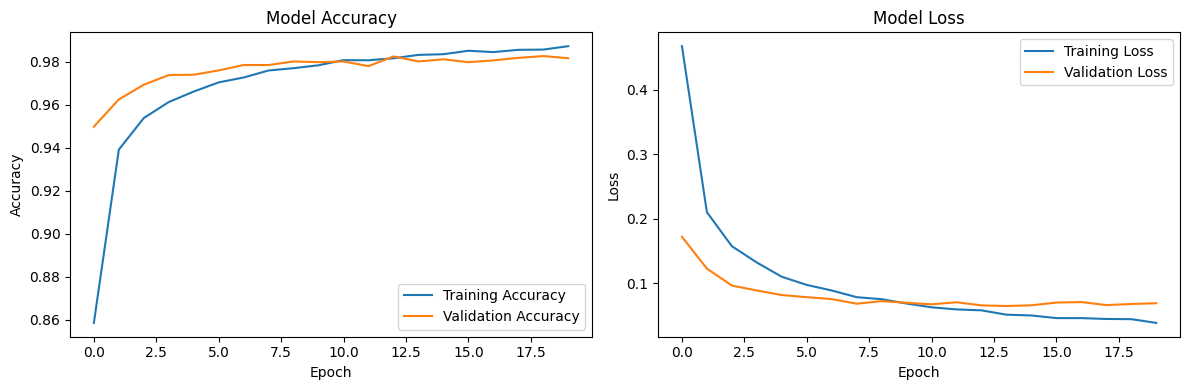

In [ ]:
#@title Visualiaasi
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Grafik Akurasi (kiri):

Garis biru menunjukkan akurasi pelatihan, dan garis oranye menunjukkan akurasi validasi.
Secara umum, akurasi meningkat dengan bertambahnya epoch dan stabil setelah beberapa epoch.
Grafik Loss (kanan):

Garis biru menunjukkan loss pelatihan, dan garis oranye menunjukkan loss validasi.
Loss menurun dengan bertambahnya epoch, menunjukkan bahwa model menjadi lebih baik dalam memprediksi data, tetapi kemudian mulai stabil.


## Kesimpulannya
Kesimpulannya, model ini memiliki akurasi yang baik, dengan training dan validation loss yang konsisten menurun, menunjukkan bahwa tidak ada masalah overfitting yang signifikan.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


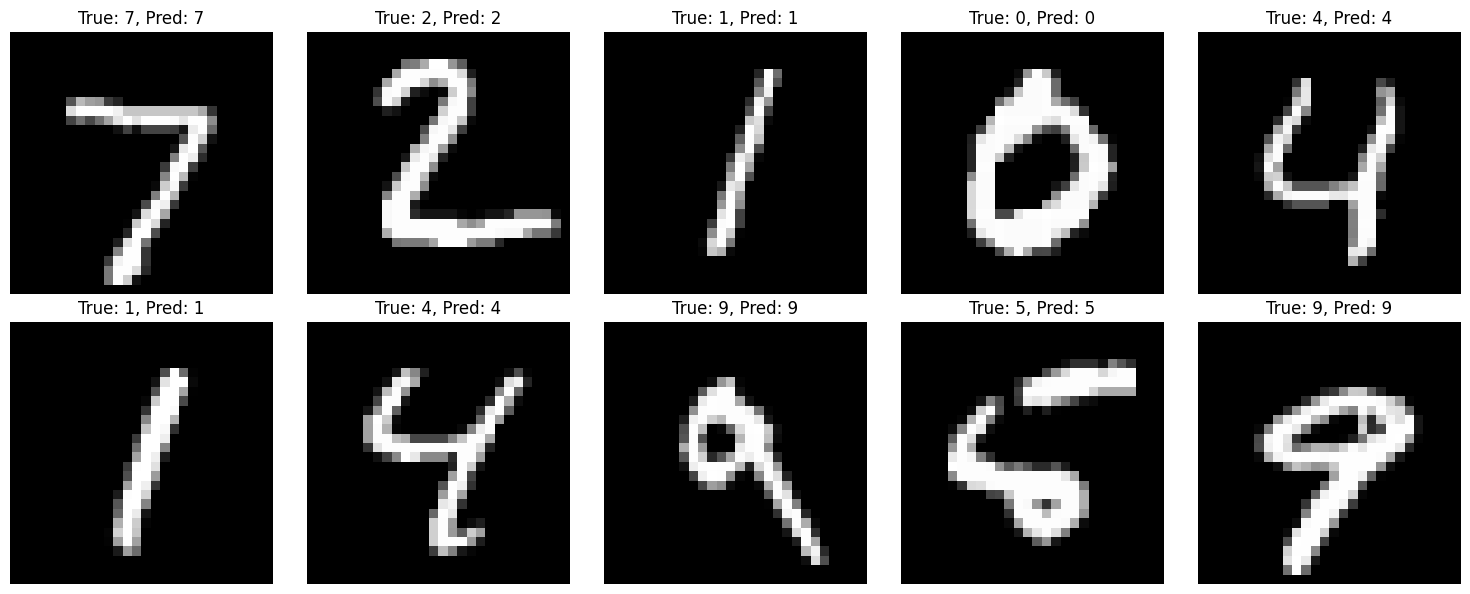

In [ ]:
#@title Predict Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Display some example predictions
num_examples = 10
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


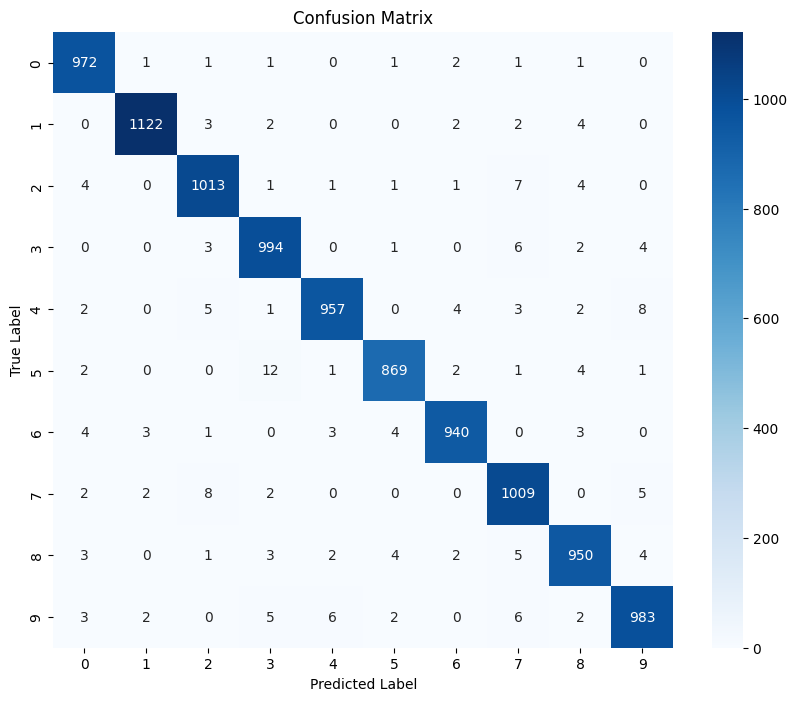

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



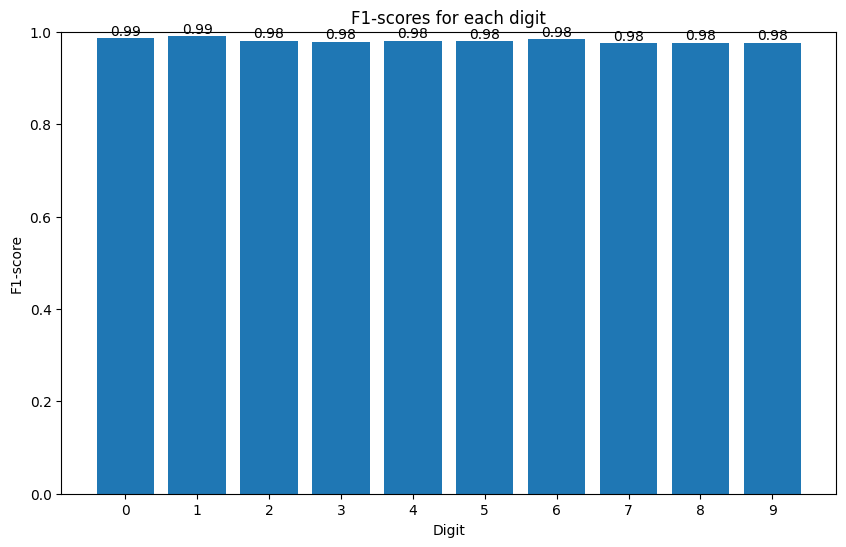

In [ ]:
# Calculate and display confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate and display classification report (including F1-score)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(class_report)

# Calculate and plot F1-scores for each class
f1_scores = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)], output_dict=True)
f1_scores_dict = {k: v['f1-score'] for k, v in f1_scores.items() if k.isdigit()}

plt.figure(figsize=(10, 6))
plt.bar(f1_scores_dict.keys(), f1_scores_dict.values())
plt.title('F1-scores for each digit')
plt.xlabel('Digit')
plt.ylabel('F1-score')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores_dict.values()):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()